<a href="https://colab.research.google.com/github/obulreddy-k/Practical_ML/blob/main/Randomly_Shuffling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  !pip install tf-nightly-2.0-preview
except Exception:
  pass
import tensorflow as tf
import matplotlib.pyplot as plt
titanic_file = tf.keras.utils.get_file("train.csv","https://storage.googleapis.com/tf-datasets/titanic/train.csv")
lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()
dataset = tf.data.Dataset.zip((counter,lines))
dataset = dataset.shuffle(buffer_size = 100)
dataset = dataset.batch(20)
dataset


ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview


<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.string)>

In [9]:
n, line_batch = next(iter(dataset))
print(n.numpy())

[69 42 76  7 13 83 40 82 67 30 59 96 74 66 23  8  1 51 84 34]


In [10]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.shuffle(buffer_size = 100).batch(10).repeat(2)
print("Here are the item IDs near the epoch boundary : \n")
for n, line_batch in shuffled.skip(60).take(5):
  print(n.numpy())


Here are the item IDs near the epoch boundary : 

[588 308 567 527 625 379 553 530 497 615]
[556 524 594 351 614 609 474 563 406 562]
[589 449 627 516 564 610 270 175]
[30 18 74 69 99  9 19 90 12 84]
[ 38 108  93  57  23  28  25   6  67   7]


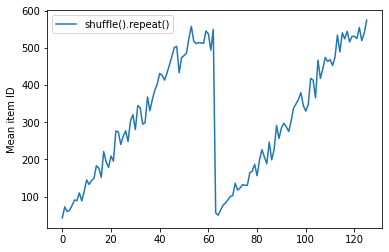

In [11]:
shuffle_repeat = [n.numpy().mean() for n,line_batch in shuffled]
plt.plot(shuffle_repeat,label = "shuffle().repeat()")
plt.ylabel("Mean item ID")
plt.legend()


In [12]:
dataset = tf.data.Dataset.zip((counter,lines))
shuffled = dataset.repeat(2).shuffle(buffer_size = 100).batch(10)

print("Here are the item ID's near the epoch boundary: \n")
for n,line_batch in shuffled.skip(55).take(15):
  print(n.numpy())



Here are the item ID's near the epoch boundary: 

[212 553 510 442 586 566 440   0 517 559]
[  4 593 450 625 604 616 612 540 597   2]
[ 22  20 406 624 515  26 571 610 282  29]
[613 603  25 508  51  45  30  42 601 622]
[469 544  41 473  11  61  53 598 526 501]
[ 36 614  40  28 520  44   9 534  13 577]
[530  34  81 525  17  63  56 596 584  48]
[ 35 377  19 405  78 398  64  88 489 504]
[ 99  15  14  74  54  98  75 509  80 599]
[100  97 420  85  59  83  89  31  77 602]
[ 86  52 112 547   3 116  32 421 576  50]
[471  21  16 125  70  18  39  24  93 310]
[126  37  82 141  27  49 118 124 149  92]
[561 104  65   1 588 519 120  71  96 627]
[155 579 145 606 156 162 130 581  84  46]


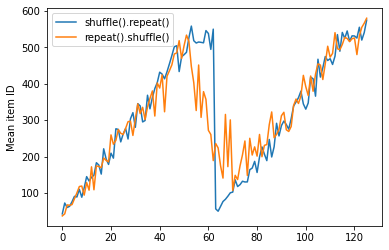

In [13]:
repeat_shuffle = [n.numpy().mean() for n,line_batch in shuffled]
plt.plot(shuffle_repeat, label="shuffle().repeat()")
plt.plot(repeat_shuffle,label="repeat().shuffle()")
plt.ylabel("Mean item ID")
plt.legend()

In [17]:
#Processing Data
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))
#Reads an image from a file,decodes it into a dense tensor, and resizes it toa fixed shape.
def parse_image(filename):
  parts = tf.strings.split(file_path,'/')
  label = parts[-2]
  image = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image,tf.float32)
  image = tf.image.resize(image,[128,128])
  return image, label

NameError: ignored

In [18]:
file_path = next(iter(list_ds))
image,label = parse_image(file_path)
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')
  show(image,label)
  

NameError: ignored

In [19]:
image_ds = list_ds.map(parse_image)
for image,label in images_ds.take(2):
  show(image,label)

NameError: ignored

In [20]:
import scipy.ndimage as ndimage
def random_rotate_image(image):
  image = ndimage.rotate(image,np.random.uniform(-30,30),reshape = False)
  return image

In [21]:
image,label = next(iter(images_ds))
image = random_rotate_image(image)
show(image,label)
def tf_random_rotate_image(image,label):
  im_shape = image.shape
  [image,] = tf.py_function(random_rotate_image, [image], [tf.float32])
  image.set_shape(im_shape)
  return image,label

NameError: ignored

In [22]:
rot_ds = images_ds.map(tf_random_rotate_image)
for image,label in rot_ds.take(2):
  show(image,label)

NameError: ignored